# Congressional Voting Classification

#Objective
The main objective is to predict whether congressmen is Democrat or Republican based on voting patterns by using the decision tree with the adaboost.

#Adaboost
AdaBoost is an ensemble learning method (also known as “meta-learning”) which was initially created to increase the efficiency of binary classifiers. AdaBoost uses an iterative approach to learn from the mistakes of weak classifiers, and turn them into strong ones.


#Data Set
This data set includes votes for each of the U.S. House of Representatives Congressmen on the 16 key votes identified by the CQA. The CQA lists nine different types of votes: voted for, paired for, and announced for (these three simplified to yea), voted against, paired against, and announced against (these three simplified to nay), voted present, voted present to avoid conflict of interest, and did not vote or otherwise make a position known (these three simplified to an unknown disposition).


##Attribute Information:
1. Class Name: 2 (democrat, republican)
2. handicapped-infants: 2 (y,n)
3. water-project-cost-sharing: 2 (y,n)
4. adoption-of-the-budget-resolution: 2 (y,n)
5. physician-fee-freeze: 2 (y,n)
6. el-salvador-aid: 2 (y,n)
7. religious-groups-in-schools: 2 (y,n)
8. anti-satellite-test-ban: 2 (y,n)
9. aid-to-nicaraguan-contras: 2 (y,n)
10. mx-missile: 2 (y,n)
11. immigration: 2 (y,n)
12. synfuels-corporation-cutback: 2 (y,n)
13. education-spending: 2 (y,n)
14. superfund-right-to-sue: 2 (y,n)
15. crime: 2 (y,n)
16. duty-free-exports: 2 (y,n)
17. export-administration-act-south-africa: 2 (y,n)



#Source
The dataset can be obtained from the:
https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records

#Tasks:
1.	Obtained the dataset
2.	Apply pre-processing operations
3.	Train Adaboost model from scratch and test the model
4.	Train Adaboost model using sklearn
6.	Compare the performance of Adaboost, Random Forest and Decision Trees


## Part 1: Adaboost from Scratch

In [45]:
# Load the libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import matplotlib.pyplot as plt

In [12]:
# Load the dataset 
data = pd.read_csv("dataset/house-votes-84.csv")
print(data.shape)
data.head()

(435, 17)


,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [13]:
# Preprocessing
# Encoding categorical variables (if any)
# Feature Scaling
# Filling missing values (if any)
data.isna().sum()

Class Name                                 0
 handicapped-infants                       0
 water-project-cost-sharing                0
 adoption-of-the-budget-resolution         0
 physician-fee-freeze                      0
 el-salvador-aid                           0
 religious-groups-in-schools               0
 anti-satellite-test-ban                   0
 aid-to-nicaraguan-contras                 0
 mx-missile                                0
 immigration                               0
 synfuels-corporation-cutback              0
 education-spending                        0
 superfund-right-to-sue                    0
 crime                                     0
 duty-free-exports                         0
 export-administration-act-south-africa    0
dtype: int64

In [14]:
# replacing nan values with the highest occuring value.
for col in data.columns:
    data[col] = data[col].str.replace("?", data[col].mode().values[0])

In [15]:
# sanity check
for i in data.columns:
    print(i,":",(data[i]=="?").sum())

Class Name : 0
 handicapped-infants : 0
 water-project-cost-sharing : 0
 adoption-of-the-budget-resolution : 0
 physician-fee-freeze : 0
 el-salvador-aid : 0
 religious-groups-in-schools : 0
 anti-satellite-test-ban : 0
 aid-to-nicaraguan-contras : 0
 mx-missile : 0
 immigration : 0
 synfuels-corporation-cutback : 0
 education-spending : 0
 superfund-right-to-sue : 0
 crime : 0
 duty-free-exports : 0
 export-administration-act-south-africa : 0


In [16]:
#droping  export-administration-act-south-africa because more than 25% of the data is corrupted
data = data.drop([" export-administration-act-south-africa"],axis = 1)

In [17]:
print(data.shape)
data.head()

(435, 16)


,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports
0,republican,n,y,n,y,y,y,n,n,n,y,n,y,y,y,n
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n
2,democrat,n,y,y,n,y,y,n,n,n,n,y,n,y,y,n
3,democrat,n,y,y,n,y,y,n,n,n,n,y,n,y,n,n
4,democrat,y,y,y,n,y,y,n,n,n,n,y,n,y,y,y


In [20]:
# Divide the dataset to training and testing set
le = LabelEncoder()
cols = list(data.columns)

data[cols] = data[cols].apply(le.fit_transform)
data.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports
0,1,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0
1,1,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0
2,0,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0
3,0,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0
4,0,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1


In [21]:
X = data.drop(columns = ['Class Name'], axis = 1)
y = data["Class Name"]

In [22]:
print("X shape : ", X.shape)
print("y shape : ", y.shape)

X shape :  (435, 15)
y shape :  (435,)


In [23]:
# replacing 0 in y to -1, classes : {-1, 1}
y = y.map({0 : -1, 1 : 1})
y.head()

0    1
1    1
2   -1
3   -1
4   -1
Name: Class Name, dtype: int64

In [25]:
y.value_counts()

-1    267
 1    168
Name: Class Name, dtype: int64

In [26]:
# split the dataset into training and testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [27]:
print("X train shape : ", X_train.shape)
print("y train shape : ", y_train.shape)
print("X test shape : ", X_test.shape)
print("y test shape : ", y_test.shape)

X train shape :  (348, 15)
y train shape :  (348,)
X test shape :  (87, 15)
y test shape :  (87,)


In [28]:
# Implement Adaboost model from scratch
# Adaboost consist of stumps which can be created using builtin decision trees in sklearn
# Stump can be trained by keeping the max_depth as 1

class AdaBoost:

    def __init__(self):
        self.stumps = None
        self.stump_weights = None
        self.errors = None
        self.sample_weights = None
        
    def fit(self, X, y, no_learners):

        n = X.shape[0]

        self.sample_weights = np.zeros(shape=(no_learners, n))
        self.stumps = np.zeros(shape=no_learners, dtype=object)
        self.stump_weights = np.zeros(shape=no_learners)
        self.errors = np.zeros(shape=no_learners)

        self.sample_weights[0] = np.ones(shape=n) / n

        for learner in range(no_learners):

            curr_sample_weights = self.sample_weights[learner]
            stump = DecisionTreeClassifier(max_depth=1, max_leaf_nodes=2)
            stump = stump.fit(X, y, sample_weight=curr_sample_weights)

            stump_pred = stump.predict(X)

            err = curr_sample_weights[(stump_pred != y)].sum()
            
            stump_weight = np.log((1 - err) / err) / 2


            new_sample_weights = curr_sample_weights * np.exp(-stump_weight * y * stump_pred)       

            new_sample_weights /= new_sample_weights.sum()

            if learner+1 < no_learners:
                self.sample_weights[learner+1] = new_sample_weights

            self.stumps[learner] = stump
            self.stump_weights[learner] = stump_weight
            self.errors[learner] = err

        return self


    def weighted_predictions(self, X):
        stump_preds = np.array([stump.predict(X) for stump in self.stumps])
        print(stump_preds.shape)
        return np.sign(np.dot(self.stump_weights, stump_preds))
    
    def predict(self,X):
        stump_preds = np.array([stump.predict(X) for stump in self.stumps])
        stump_preds = stump_preds.T
        ans = np.zeros((stump_preds.shape[0]))
        for i in range(stump_preds.shape[0]):
            (values,counts) = np.unique(stump_preds[i],return_counts=True)            
            ans[i] = stump_preds[i][np.argmax(counts)]                       
        
        return ans




In [29]:
# Train the model and test the model
model = AdaBoost()
model.fit(X_train.values, y_train.values, 10)

In [33]:
# testing on the training data
y_pred_train = model.predict(X_train)

In [34]:
print("For training data : \n", classification_report(y_train, y_pred_train))

For training data : 
               precision    recall  f1-score   support

          -1       0.98      0.94      0.96       211
           1       0.92      0.97      0.94       137

    accuracy                           0.95       348
   macro avg       0.95      0.96      0.95       348
weighted avg       0.96      0.95      0.95       348



In [30]:
# Evaluate the results using accuracy, precision, recall and f-measure
y_pred_test = model.predict(X_test)
print(y_pred_test.shape)

(87,)


In [32]:
print("For testing data : \n", classification_report(y_test, y_pred_test))

For testing data : 
               precision    recall  f1-score   support

          -1       0.98      0.96      0.97        56
           1       0.94      0.97      0.95        31

    accuracy                           0.97        87
   macro avg       0.96      0.97      0.96        87
weighted avg       0.97      0.97      0.97        87



## Part 2: Adaboost using Sklearn

In [40]:
# Use the preprocessed dataset here
clf = AdaBoostClassifier(n_estimators = 10, random_state = 42)


In [41]:
# Train the Adaboost Model using builtin Sklearn Dataset
clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=10, random_state=42)

In [42]:
# Test the model with testing set and print the accuracy, precision, recall and f-measure
y_pred_test = clf.predict(X_test)
print("On testing data : \n", classification_report(y_test, y_pred_test))

On testing data : 
               precision    recall  f1-score   support

          -1       0.96      0.96      0.96        56
           1       0.94      0.94      0.94        31

    accuracy                           0.95        87
   macro avg       0.95      0.95      0.95        87
weighted avg       0.95      0.95      0.95        87



In [43]:
# Play with parameters such as
# number of decision trees
# Criterion for splitting
# Max depth
# Minimum samples per split and leaf

[ 1  2  3  4  5  6  7  8  9 10]


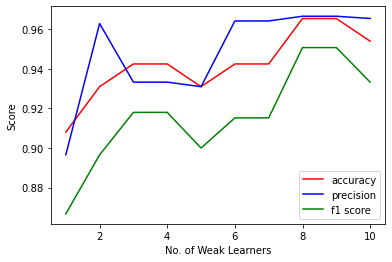

In [50]:
model_acc, model_f1, model_precision = [], [], []

for i in range(1,11):
    clf = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(), n_estimators=i, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    model_acc.append(accuracy_score(y_test,y_pred))
    model_f1.append(f1_score(y_test,y_pred))
    model_precision.append(precision_score(y_test, y_pred))
    
x = np.arange(1, 11)
print(x)
plt.plot(x, model_acc, label = "accuracy", color='r')
plt.plot(x, model_precision, label = "precision", color='b')
plt.plot(x, model_f1, label = "f1 score", color='g')


plt.legend()
plt.xlabel("No. of Weak Learners")
plt.ylabel("Score")
plt.show()

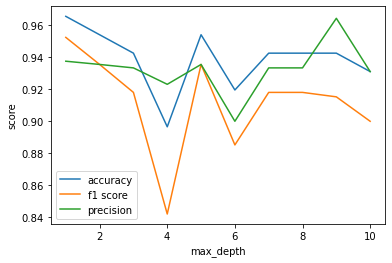

In [51]:
depth_acc, depth_f1, depth_precision = [], [], []

for i in range(1,11):
    clf = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = i), n_estimators=5, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    depth_acc.append(accuracy_score(y_test, y_pred))
    depth_f1.append(f1_score(y_test, y_pred))
    depth_precision.append(precision_score(y_test, y_pred))
    
    
import matplotlib.pyplot as plt
x = np.arange(1, 11)
plt.plot(x, depth_acc,label = "accuracy")
plt.plot(x, depth_f1, label = "f1 score")
plt.plot(x, depth_precision, label = "precision")

plt.legend()
plt.xlabel("max_depth")
plt.ylabel("score")
plt.show()

In [53]:
criterion = ["gini","entropy"]
for i in criterion:
    clf = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(criterion = i), n_estimators=5, random_state=0)
    clf.fit(X_train, y_train)
    test_predictions = clf.predict(X_test)
    print("accuracy with criterion as {} :".format(i),accuracy_score(y_test,test_predictions))
    print("f1 with criterion {} :".format(i),f1_score(y_test,test_predictions))
    print("precision with criterion as {} :".format(i),precision_score(y_test,test_predictions))
    print("===========================================================================================")
    

accuracy with criterion as gini : 0.9310344827586207
f1 with criterion gini : 0.9
precision with criterion as gini : 0.9310344827586207
accuracy with criterion as entropy : 0.9425287356321839
f1 with criterion entropy : 0.9180327868852459
precision with criterion as entropy : 0.9333333333333333


## Part 3: Compare the models

In [54]:
# Train Adaboost, Random Forest and Decision tree models from sklearn
ada = AdaBoostClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

In [55]:
# Fitting the models on training dataset
ada.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [56]:
# testing on the training data
y_pred_train_ada = ada.predict(X_train)
y_pred_train_dt = dt.predict(X_train)
y_pred_train_rf = rf.predict(X_train)

In [58]:
print("AdaBoost : \n", classification_report(y_train, y_pred_train_ada))
print("===========================================================================================")
print("DecisionTree : \n", classification_report(y_train, y_pred_train_dt))
print("===========================================================================================")
print("RandomForest : \n", classification_report(y_train, y_pred_train_rf))

AdaBoost : 
               precision    recall  f1-score   support

          -1       0.97      0.97      0.97       211
           1       0.96      0.95      0.95       137

    accuracy                           0.96       348
   macro avg       0.96      0.96      0.96       348
weighted avg       0.96      0.96      0.96       348

DecisionTree : 
               precision    recall  f1-score   support

          -1       1.00      1.00      1.00       211
           1       0.99      0.99      0.99       137

    accuracy                           0.99       348
   macro avg       0.99      0.99      0.99       348
weighted avg       0.99      0.99      0.99       348

RandomForest : 
               precision    recall  f1-score   support

          -1       1.00      0.99      1.00       211
           1       0.99      1.00      0.99       137

    accuracy                           0.99       348
   macro avg       0.99      1.00      0.99       348
weighted avg       0.99    

In [59]:
# Run the model on testing set
y_pred_test_ada = ada.predict(X_test)
y_pred_test_dt = dt.predict(X_test)
y_pred_test_rf = rf.predict(X_test)

In [60]:
print("AdaBoost : \n", classification_report(y_test, y_pred_test_ada))
print("===========================================================================================")
print("DecisionTree : \n", classification_report(y_test, y_pred_test_dt))
print("===========================================================================================")
print("RandomForest : \n", classification_report(y_test, y_pred_test_rf))

AdaBoost : 
               precision    recall  f1-score   support

          -1       0.96      0.98      0.97        56
           1       0.97      0.94      0.95        31

    accuracy                           0.97        87
   macro avg       0.97      0.96      0.96        87
weighted avg       0.97      0.97      0.97        87

DecisionTree : 
               precision    recall  f1-score   support

          -1       0.91      0.95      0.93        56
           1       0.90      0.84      0.87        31

    accuracy                           0.91        87
   macro avg       0.91      0.89      0.90        87
weighted avg       0.91      0.91      0.91        87

RandomForest : 
               precision    recall  f1-score   support

          -1       0.96      0.96      0.96        56
           1       0.94      0.94      0.94        31

    accuracy                           0.95        87
   macro avg       0.95      0.95      0.95        87
weighted avg       0.95    

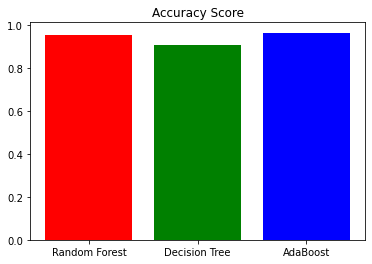

In [61]:
# Compare their accuracy, precision, recall and f-measure

# ACCURACY SCORE
x1 = ["Random Forest","Decision Tree","AdaBoost"]
y1 = [accuracy_score(y_test, y_pred_test_rf) , accuracy_score(y_test, y_pred_test_dt),accuracy_score(y_test, y_pred_test_ada)]
plt.bar(x1,y1,color=['r','g','b'])
plt.title("Accuracy Score")
plt.show()

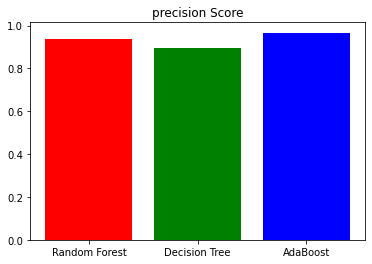

In [62]:
# Compare their accuracy, precision, recall and f-measure

# ACCURACY SCORE
x1 = ["Random Forest","Decision Tree","AdaBoost"]
y1 = [precision_score(y_test, y_pred_test_rf) , precision_score(y_test, y_pred_test_dt),precision_score(y_test, y_pred_test_ada)]
plt.bar(x1,y1,color=['r','g','b'])
plt.title("precision Score")
plt.show()

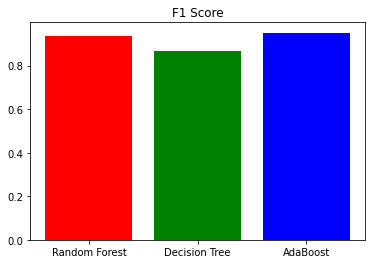

In [63]:
# Compare their accuracy, precision, recall and f-measure

# ACCURACY SCORE
x1 = ["Random Forest","Decision Tree","AdaBoost"]
y1 = [f1_score(y_test, y_pred_test_rf) , f1_score(y_test, y_pred_test_dt),f1_score(y_test, y_pred_test_ada)]
plt.bar(x1,y1,color=['r','g','b'])
plt.title("F1 Score")
plt.show()